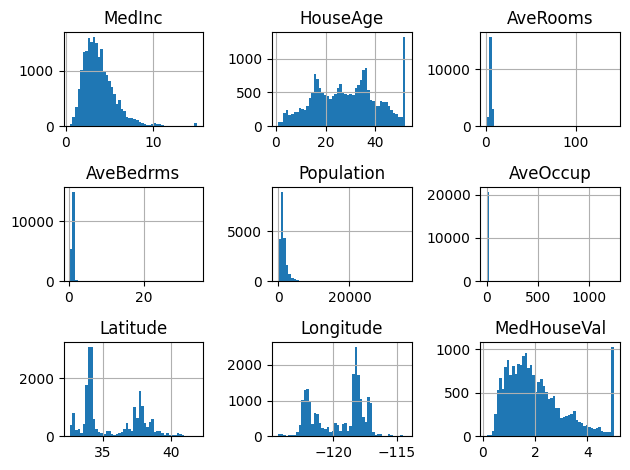

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

CH=fetch_california_housing()
df_california=pd.DataFrame(CH.data,columns=CH.feature_names)
df_california[CH.target_names[0]]=CH.target
df_california.hist(bins=50)
plt.tight_layout()

In [2]:
df_california.skew()

,0
MedInc,1.646657
HouseAge,0.060331
AveRooms,20.697869
AveBedrms,31.316956
Population,4.935858
AveOccup,97.639561
Latitude,0.465953
Longitude,-0.297801
MedHouseVal,0.977763


# Función logaritmo

In [3]:
X=(df_california-df_california.min()+1).drop(columns=['Latitude','Longitude'])
X.min()

,0
MedInc,1.0
HouseAge,1.0
AveRooms,1.0
AveBedrms,1.0
Population,1.0
AveOccup,1.0
MedHouseVal,1.0


In [4]:
X.skew() # Tenemos los mismos sesguitos

,0
MedInc,1.646657
HouseAge,0.060331
AveRooms,20.697869
AveBedrms,31.316956
Population,4.935858
AveOccup,97.639561
MedHouseVal,0.977763


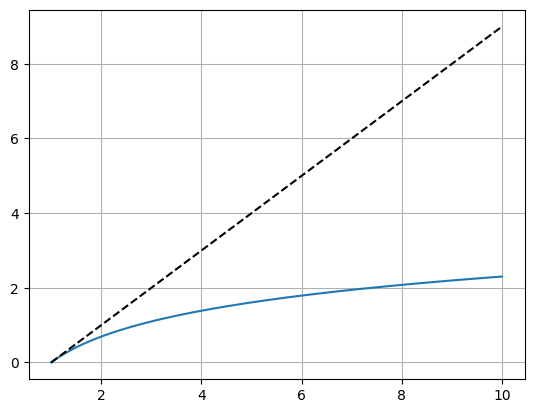

In [5]:
# Graficamos la función logaritmo
x=np.linspace(1,10,1000)
x_log=np.log(x)
plt.plot(x,x_log)
plt.plot(x,x-1,'--k')
plt.grid()

In [6]:
X_log=np.log(X)
X_log.skew()

,0
MedInc,0.078282
HouseAge,-1.289170
AveRooms,0.959245
AveBedrms,8.298256
Population,-1.140433
AveOccup,2.662098
MedHouseVal,0.237146


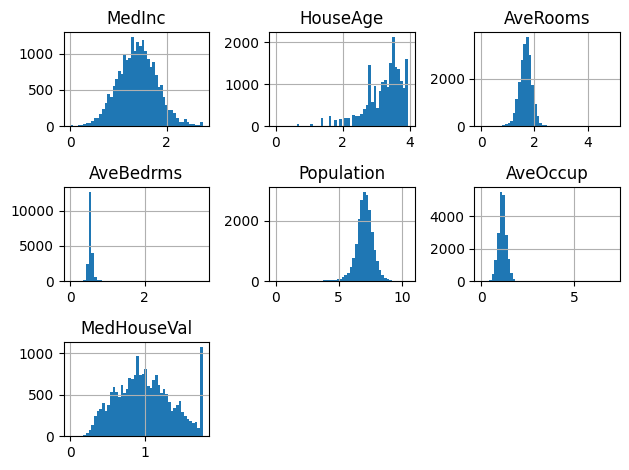

In [7]:
X_log.hist(bins=50)
plt.tight_layout()

# Función recíproca

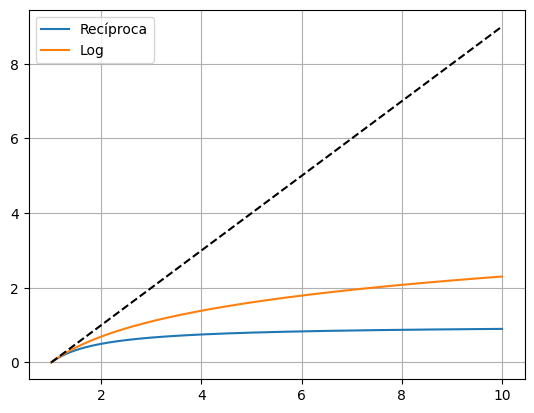

In [8]:
x=np.linspace(1,10,1000)
x_rec=-(1/x-1)
plt.plot(x,x_rec,label='Recíproca')
plt.plot(x,x_log,label='Log')
plt.plot(x,x-1,'--k')
plt.legend()
plt.grid()

In [9]:
# np.reciprocal
X_rec=-(1/X-1)
X_rec.skew()

,0
MedInc,-1.329928
HouseAge,-5.719626
AveRooms,-1.864921
AveBedrms,3.911728
Population,-80.838678
AveOccup,-0.612341
MedHouseVal,-0.507905


# Regresión lineal

In [10]:
X_sesgos=pd.concat([X.skew(),X_log.skew(),X_rec.skew()],axis=1,keys=['X','X_log','X_rec'])
X_sesgos

,X,X_log,X_rec
MedInc,1.646657,0.078282,-1.329928
HouseAge,0.060331,-1.289170,-5.719626
AveRooms,20.697869,0.959245,-1.864921
AveBedrms,31.316956,8.298256,3.911728
Population,4.935858,-1.140433,-80.838678
AveOccup,97.639561,2.662098,-0.612341
MedHouseVal,0.977763,0.237146,-0.507905


In [11]:
# Qué función generó el sesgo mínimo
np.argmin(X_sesgos.abs(),axis=1) # argmin -> regresa el índice del valor mínimo ;)

array([1, 0, 1, 2, 1, 2, 1])

In [12]:
# Mínimos
X_sesgos.abs().min(axis=1)

,0
MedInc,0.078282
HouseAge,0.060331
AveRooms,0.959245
AveBedrms,3.911728
Population,1.140433
AveOccup,0.612341
MedHouseVal,0.237146


In [13]:
f=[lambda var:var,
   lambda var:np.log(var),
   lambda var:-(1/var-1)]
X_compensada=X.copy()
for idx_var,idx_min in enumerate(np.argmin(X_sesgos.abs(),axis=1)):
  X_compensada.iloc[:,idx_var]=f[idx_min](X.iloc[:,idx_var])
X_compensada.skew()

,0
MedInc,0.078282
HouseAge,0.060331
AveRooms,0.959245
AveBedrms,3.911728
Population,-1.140433
AveOccup,-0.612341
MedHouseVal,0.237146


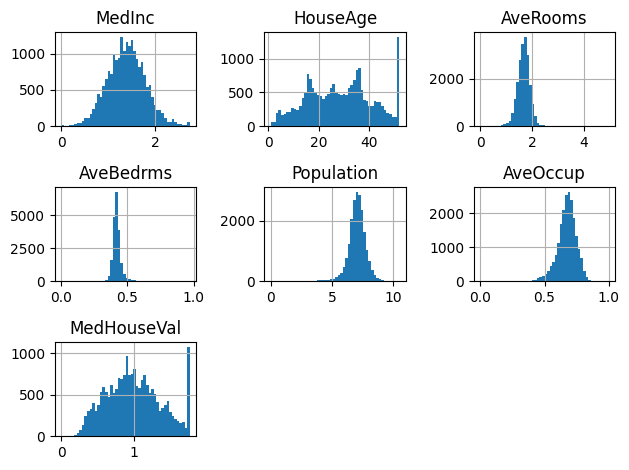

In [14]:
X_compensada.hist(bins=50)
plt.tight_layout()

In [ ]:
# Regresión lineal
#
# Entrenamiento:
X_train,X_test,y_train,y_test=train_test_split(X_compensada.drop(columns=['MedHouseVal']), # Usamos las variables transformadas
                                               X_compensada['MedHouseVal'])                # También para el target
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test),lr.score(X_train,y_train) # Hacemos la comparación sobre las transformaciones

(0.5903069226226083, 0.6016703951585218)

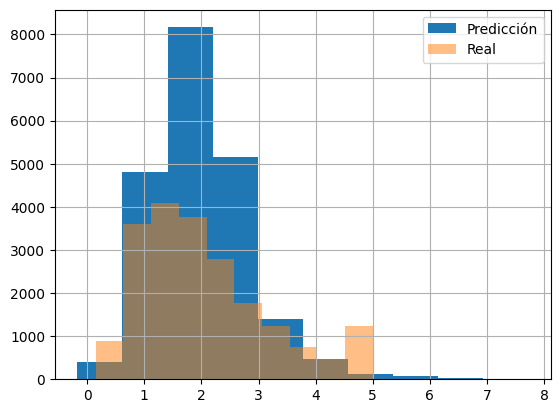

In [ ]:
# Predicción: Al resultado de la predicción le aplicamos la inversa de la transformación no lineal en Y
MedHouseVal_transformada=lr.predict(X_compensada.drop(columns=['MedHouseVal']))
f_inv=np.exp
MedHouseVal = f_inv(MedHouseVal_transformada)-1+df_california['MedHouseVal'].min()
plt.hist(MedHouseVal,label='Predicción')
plt.hist(df_california['MedHouseVal'],alpha=0.5,label='Real')
plt.legend()
plt.grid()

## Una regresión más

In [15]:
ruta='/content/drive/MyDrive/Colab Notebooks/Módulo 4 - Transformaciones de variables numéricas/'
df=pd.read_csv(ruta+'regresion.csv')
df.head(3)

,x,y
0,0.100000,1.932916
1,0.101001,2.242087
2,0.102002,2.022414


In [18]:
# Separamos los datos para entrenamiento y para prueba
X_train,X_test,y_train,y_test=train_test_split(df[['x']],df['y'])

# Transformamos los datos para compensar el sesgo
X_train.skew(), y_train.skew()

(x   -0.028325
 dtype: float64,
 np.float64(0.5825194792293705))

In [19]:
# Probamos con el logaritmo
np.log(X_train-X_train.min()+1).skew(), np.log(y_train-y_train.min()+1).skew()

(x   -0.274444
 dtype: float64,
 np.float64(-0.187127084700648))

In [20]:
# También con la otra cosa
np.reciprocal(X_train-X_train.min()+1).skew(), np.reciprocal(y_train-y_train.min()+1).skew()

(x    0.527553
 dtype: float64,
 np.float64(1.0959524287589837))

In [21]:
# Aplicamos logaritmo para 'y' y a 'X' la dejamo' tranquila
y_log=np.log(y_train-y_train.min()+1)

# Entrenamos el modelo
lr=LinearRegression()
lr.fit(X_train,y_log)

LinearRegression()

In [22]:
# Prueba
#
# Transformamos los datos de prueba
y_test_log=np.log(y_test-y_test.min()+1)
# Probamo'
lr.score(X_test,y_test_log), lr.score(X_train,y_log)

(0.798970148173159, 0.8076244749106114)

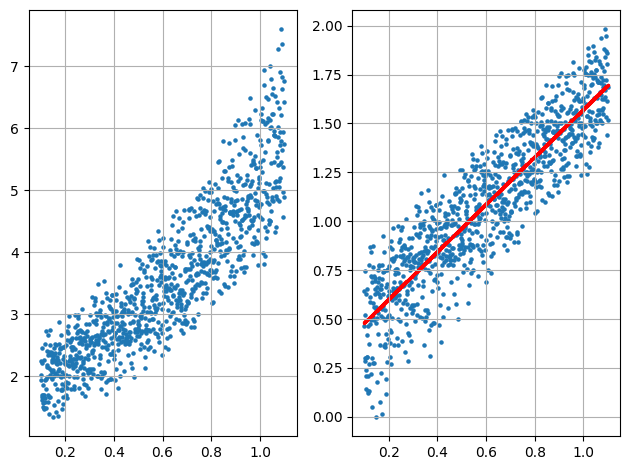

In [29]:
fig,ax=plt.subplots(1,2)
ax[0].scatter(df['x'],df['y'],s=5)
ax[1].scatter(df['x'],np.log(df['y']-df['y'].min()+1),s=5)
ax[1].scatter(df['x'],lr.predict(df[['x']]),c='r',s=2)
plt.tight_layout()
ax[0].grid()
ax[1].grid()

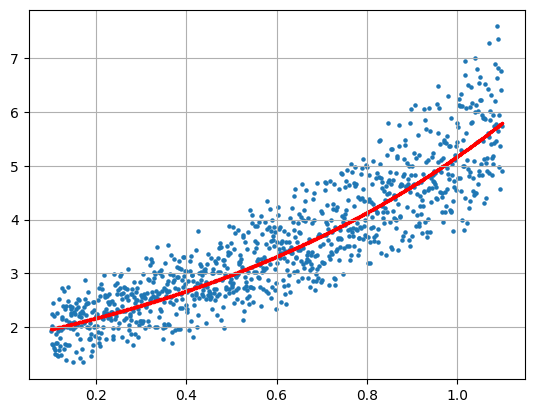

In [31]:
# Predicción
#
# Aplicamos las transformaciones a las variables
X_completa=df[['x']]
# Predecimos
Y_predicha=lr.predict(X_completa)
# Transformamos el resultado
Y=np.exp(Y_predicha)-1+df['y'].min()
# Graficación
plt.scatter(df['x'],df['y'],s=5)
plt.scatter(df['x'],Y,c='r',s=2)
plt.grid()

# Por si fueran pocas funciones

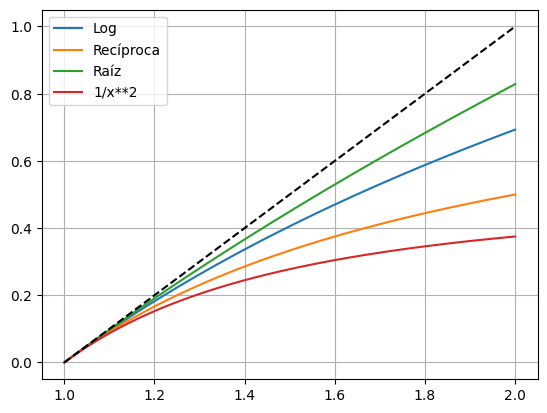

In [32]:
x=np.linspace(1,2,500)
x_log=np.log(x)
x_recip=-(1/x-1)
x_sqrt=(np.sqrt(x)-1)*2
x_recip2=-0.5*(1/x**2-1)

plt.plot(x,x_log,label='Log')
plt.plot(x,x_recip,label='Recíproca')
plt.plot(x,x_sqrt,label='Raíz')
plt.plot(x,x_recip2,label='1/x**2')
plt.plot(x,x-1,'--k')
plt.legend()
plt.grid()